In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
data = pd.read_csv('Health_insurance.csv')
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
data.shape

(1338, 7)

### Categorical data
* Sex
* Smoker
* Region

### Numerical data
* Age
* BMI
* Charges
* Children

## Check for null values

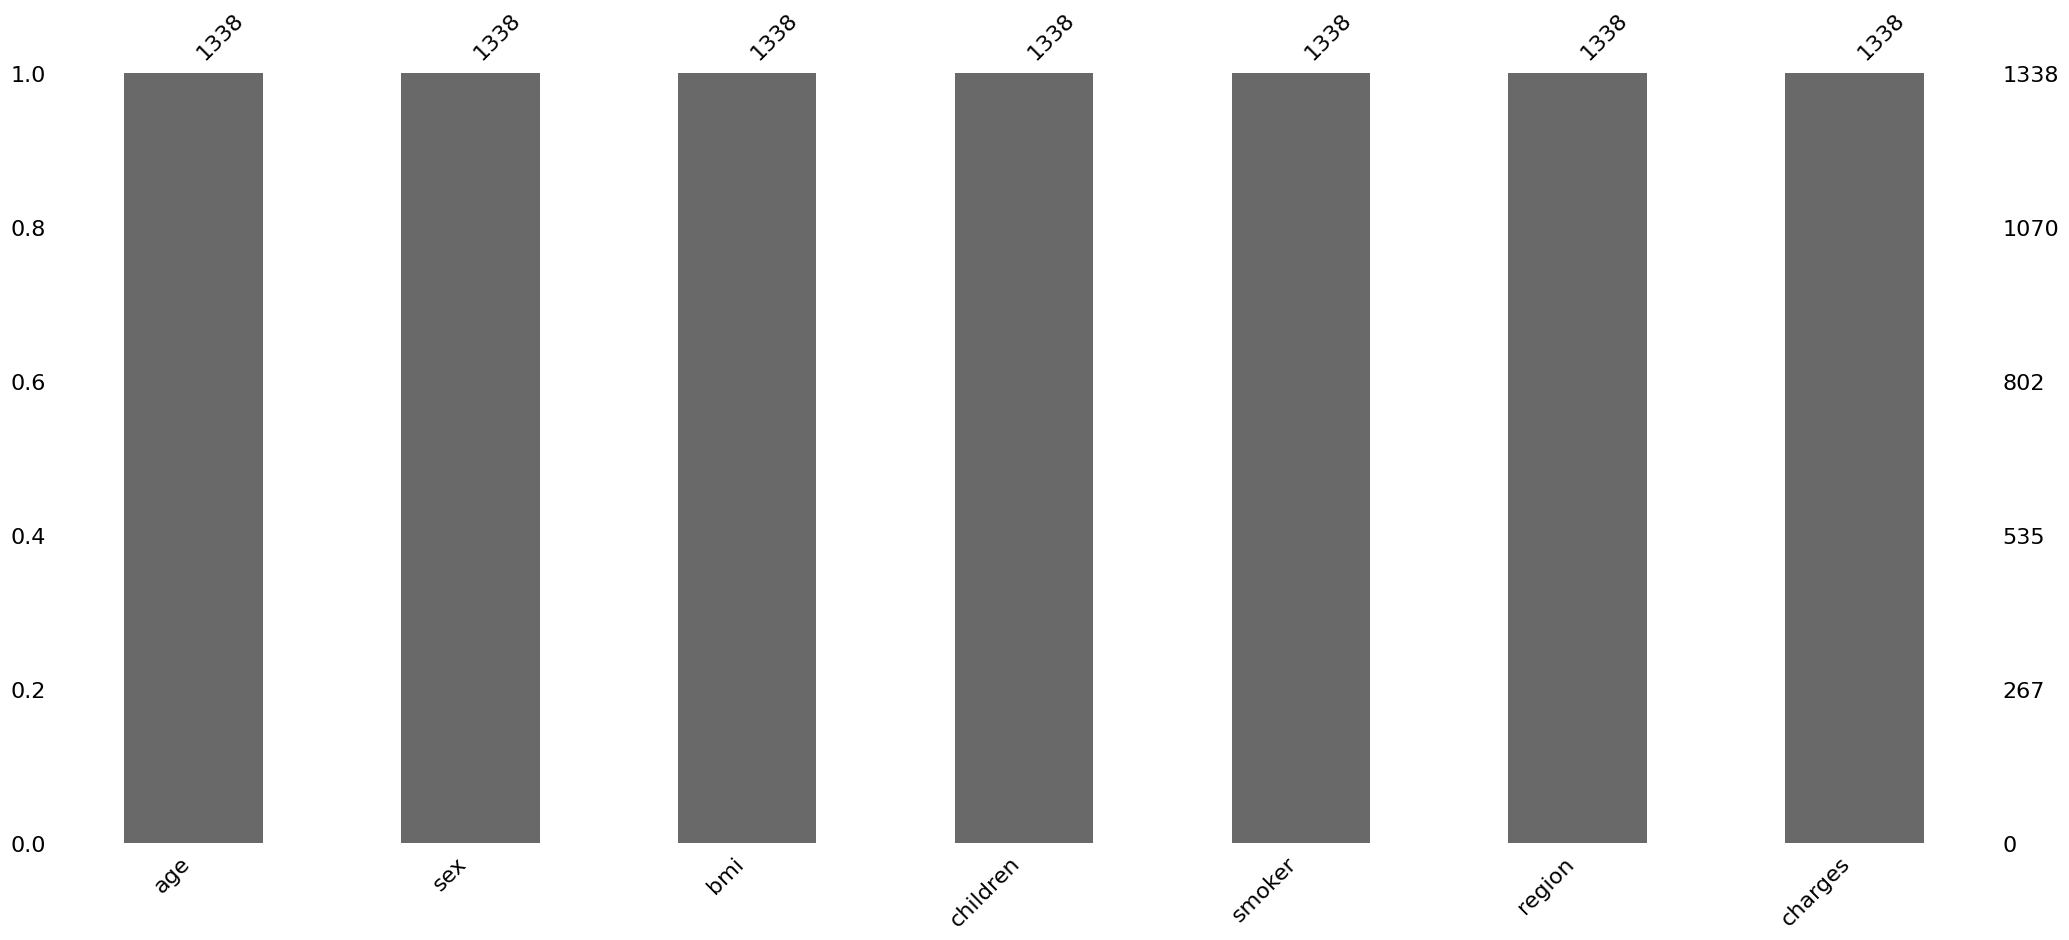

In [4]:
msn.bar(data)
plt.show()

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
for i in data.columns:
    print(f'Rows with 0 values in {i} column: ',data[data[i]==0].shape[0])

Rows with 0 values in age column:  0
Rows with 0 values in sex column:  0
Rows with 0 values in bmi column:  0
Rows with 0 values in children column:  574
Rows with 0 values in smoker column:  0
Rows with 0 values in region column:  0
Rows with 0 values in charges column:  0


### Observaion:
* There are no null values 
* There are no 0 means missing values except children column but they are fair values

## Information about data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

# EDA 

## Uni-variate analysis

## Categorical columns
* Sex
* Smoker
* Region

In [9]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## Sex

male      676
female    662
Name: sex, dtype: int64

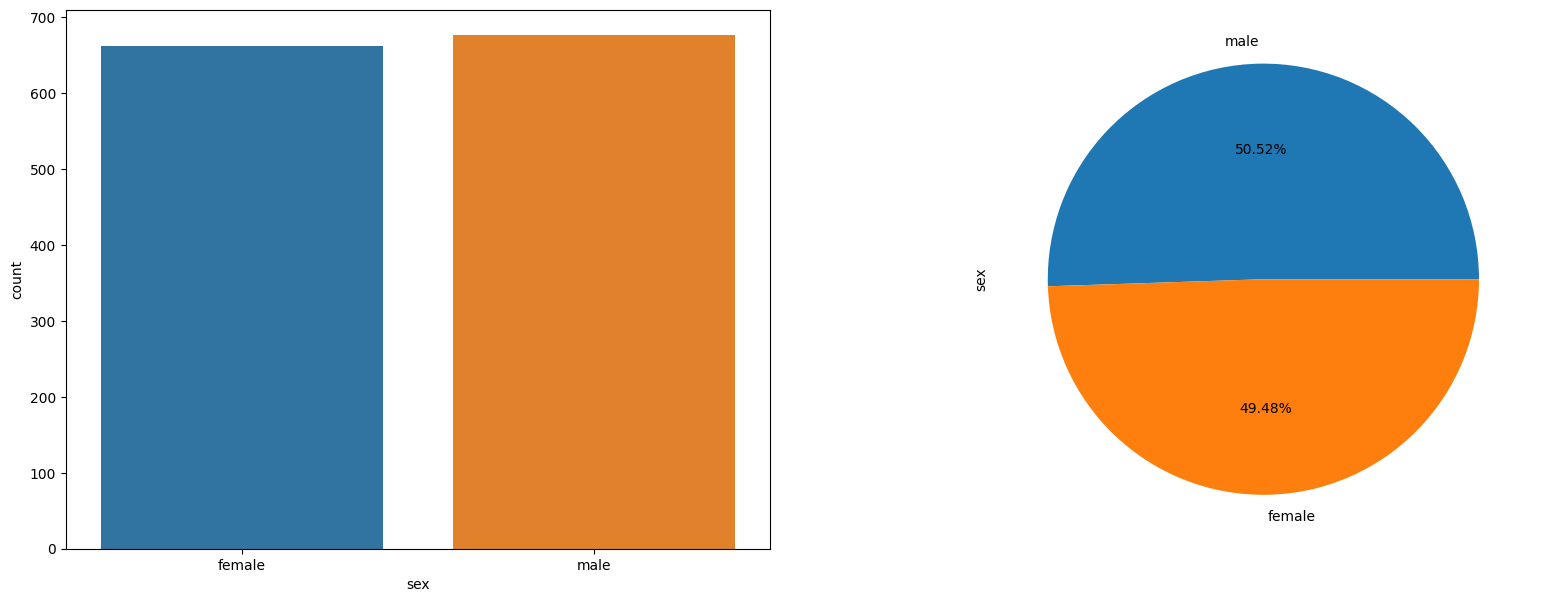

In [10]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.countplot(data=data, x='sex',ax=ax[0])
data['sex'].value_counts().plot.pie(autopct='%.2f%%',ax=ax[1])
data['sex'].value_counts()

### Observation:
* 50.52% are males i.e 676
* 49.48% are females i.e 662

## Smoker

smoker  sex   
no      female    547
        male      517
yes     male      159
        female    115
dtype: int64

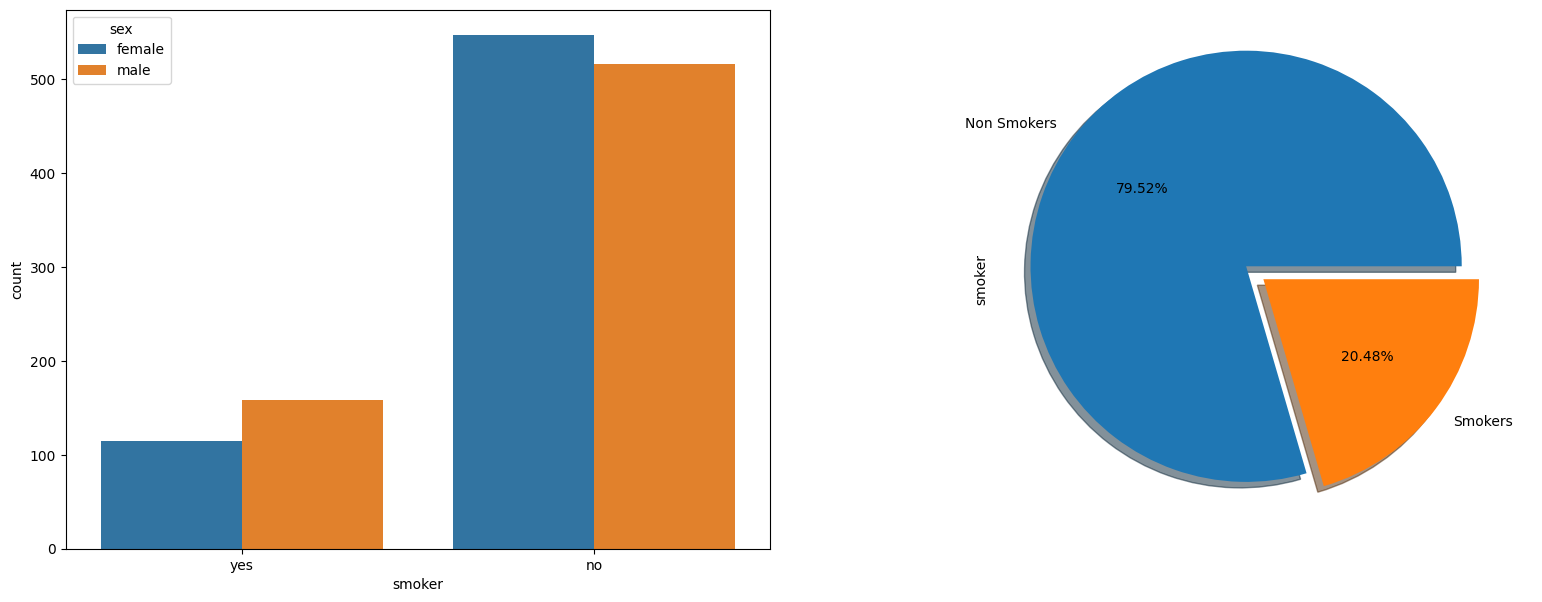

In [11]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.countplot(data=data, x='smoker',hue='sex', ax=ax[0])
data['smoker'].value_counts().plot.pie(autopct='%.2f%%', explode=(0.1,0), shadow=True, labels=['Non Smokers', 'Smokers'])
data[['smoker','sex']].value_counts()

### Observation:
* Non-moker males = 517
* Non-moker females = 547
* Total Non-smokers = 1064

* Smoker males = 159
* Smoker females = 115
* Total Smokers = 274

## Region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

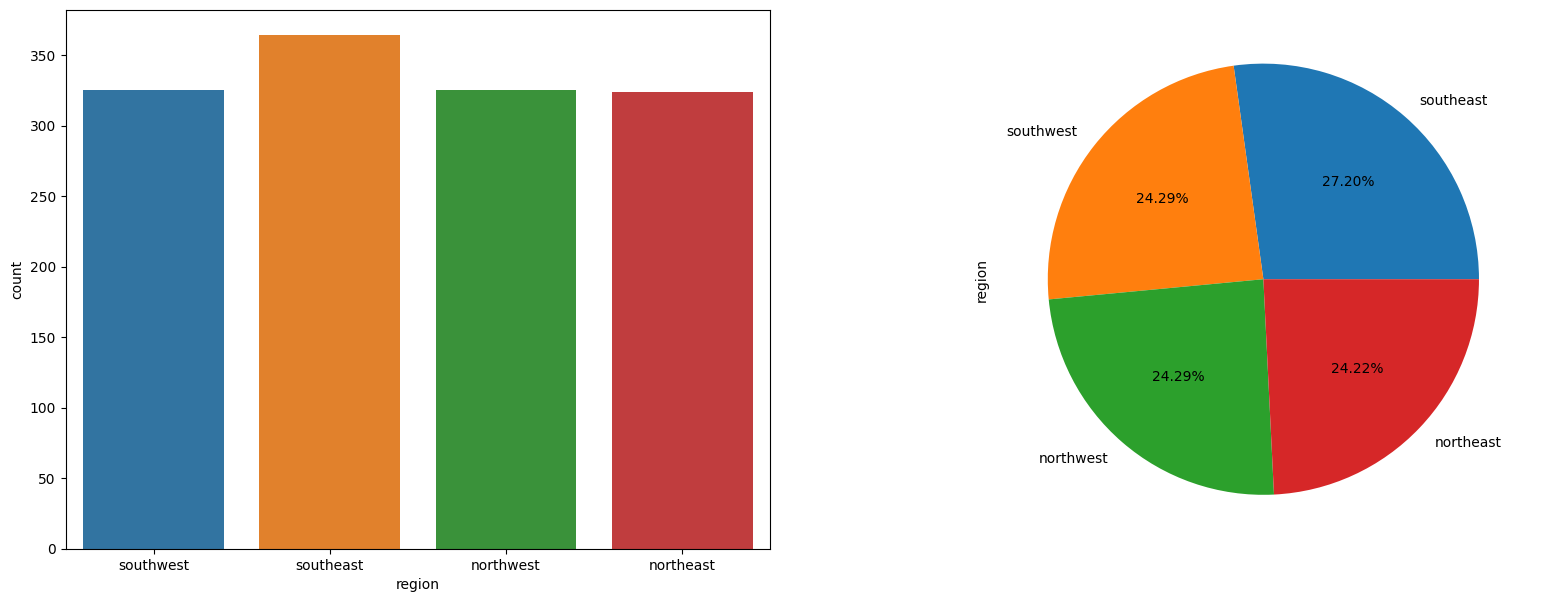

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.countplot(data=data, x='region', ax=ax[0])
data['region'].value_counts().plot.pie(autopct='%.2f%%')
data['region'].value_counts()

### Observation:
* Most (364) peoples are from southeast
* Least (324) peoples are from northeast

## Numerical columns
* Age
* BMI
* Charges
* Children

## Children

<Axes: ylabel='children'>

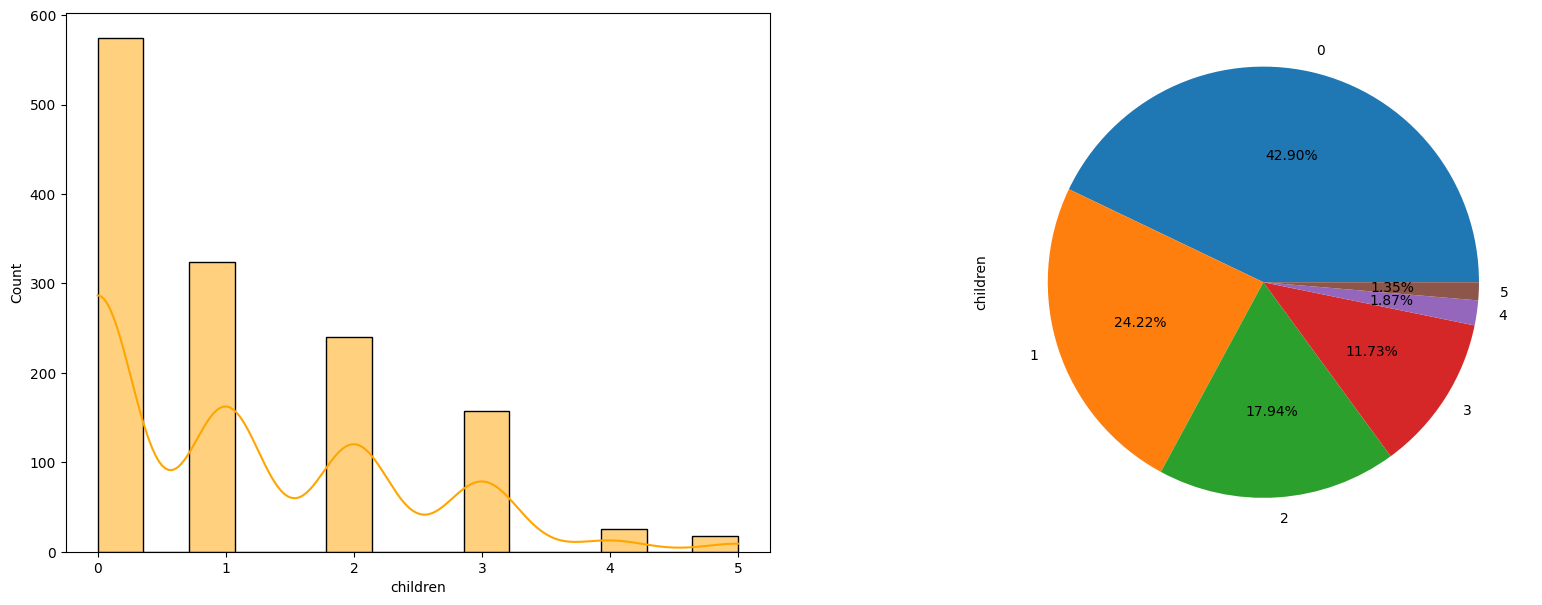

In [13]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=data, x='children',kde=True,color='orange', ax=ax[0])
data['children'].value_counts().plot.pie(autopct='%.2f%%')

### Observation:
* There are many males and females with 0 and 1 children
* And very less with 4 and 5 children

## Age

<Axes: xlabel='age'>

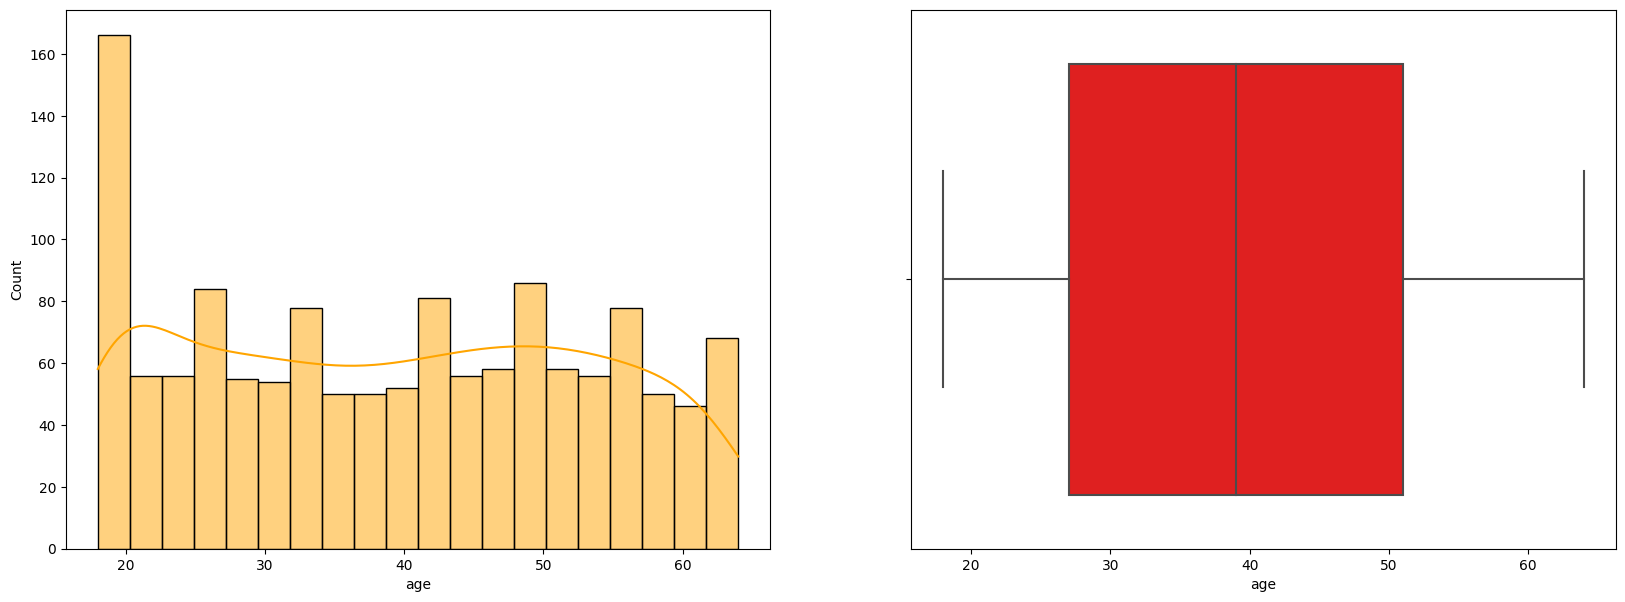

In [14]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=data, x='age', bins=20, kde=True, color='orange', ax=ax[0])
sns.boxplot(data=data, x='age', color='red',ax=ax[1])

### Observation:
* There are no outliers
* Most people belongs 0 to 20 age group

## BMI

<Axes: xlabel='bmi'>

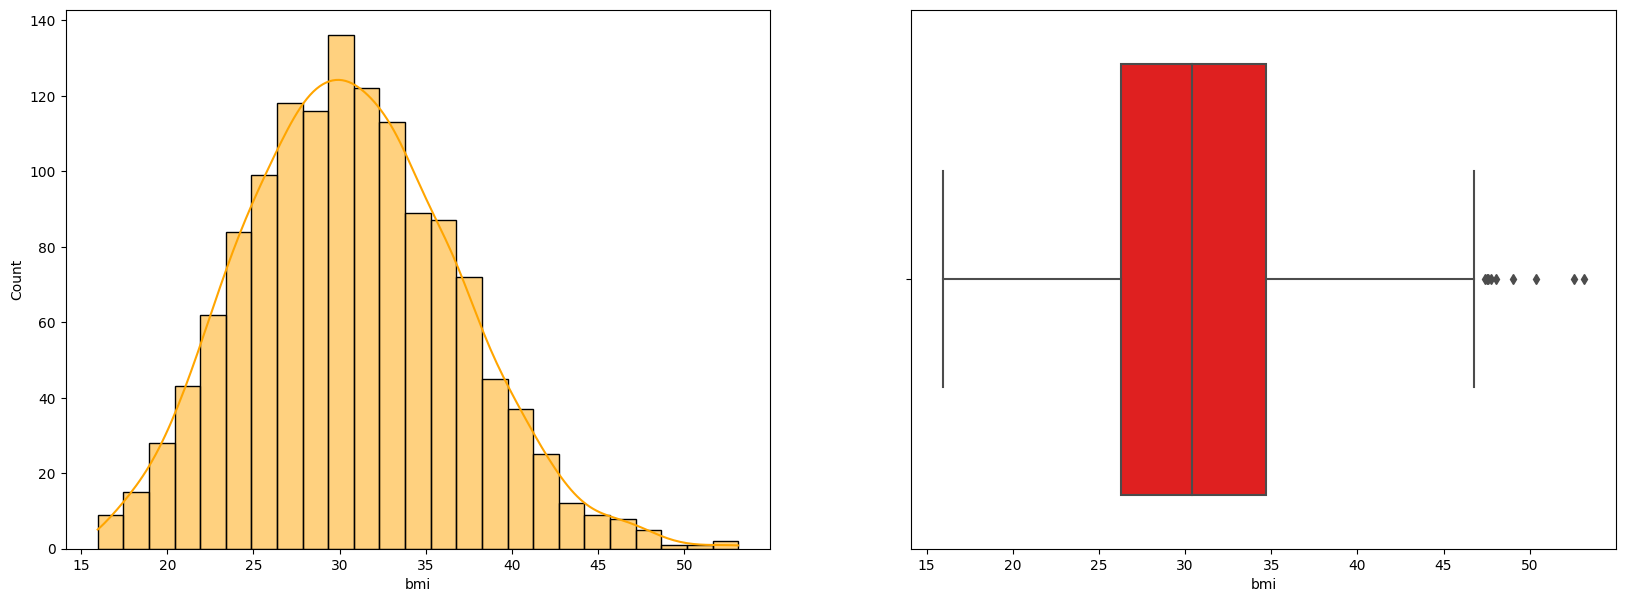

In [15]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=data, x='bmi', kde=True, color='orange', ax=ax[0])
sns.boxplot(data=data, x='bmi', color='red',ax=ax[1])

In [16]:
print('Mean of BMI: ',data['bmi'].mean())
print('Median of BMI: ',data['bmi'].median())

Mean of BMI:  30.66339686098655
Median of BMI:  30.4


### Observation:
* We see Gaussian distribution(Normal distribution) around the value 30
* Mean and Median of BMI lie very close to each other and are almost equal thats why the distribution is more or less symmetric and uniform
* There are some outliers after 46 or 47 of BMI

## Charges

<Axes: xlabel='charges'>

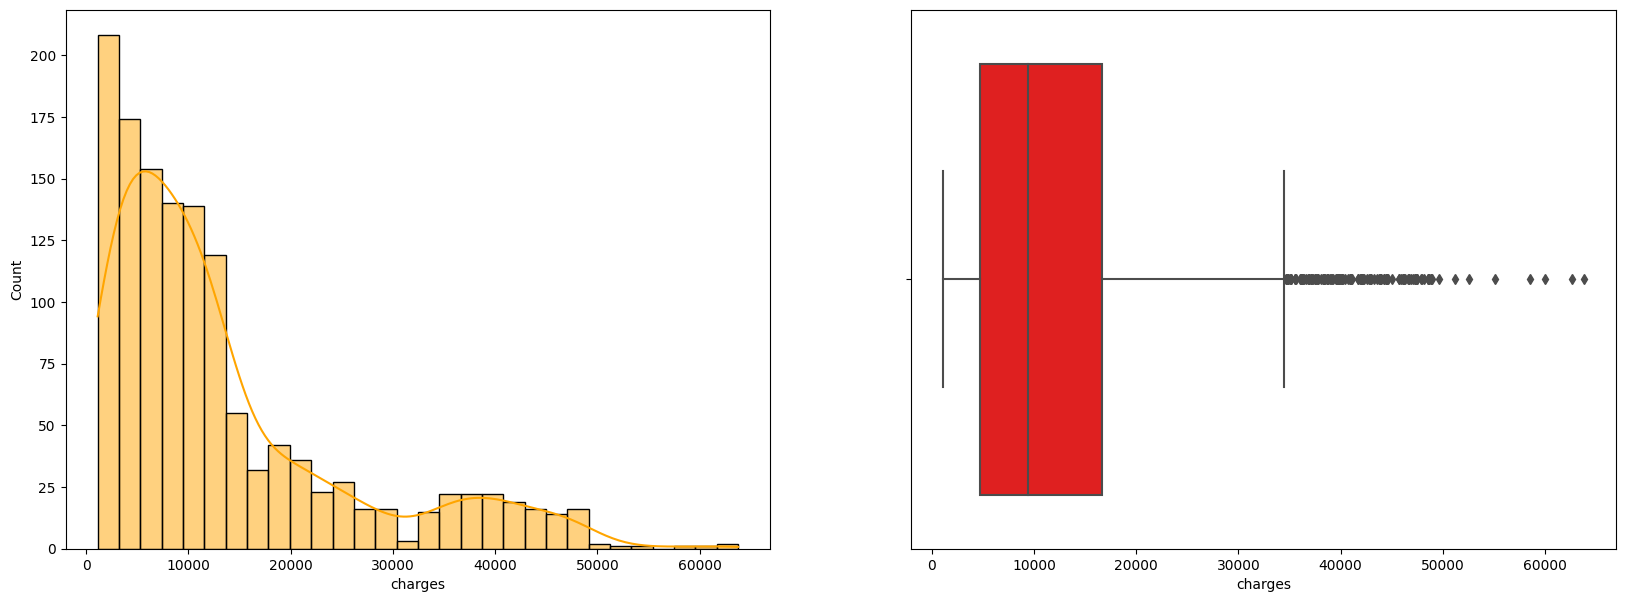

In [17]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=data, x='charges', kde=True, color='orange', ax=ax[0])
sns.boxplot(data=data, x='charges', color='red',ax=ax[1])

### Observation:
* Distribution is left skewed
* There are many outliers

## Bi-variate analysis

In [18]:
data.head(1)

age     sex   bmi  children smoker     region    charges
0   19  female  27.9         0    yes  southwest  16884.924

### Categorical - Categorical
### Smoker - Sex

In [19]:
px.histogram(data, x='smoker', color='sex', title='Smoker')

### Observation:
* Smoker Males = 159
* Smoker Females = 115
* Non-smoker Males = 517
* Non-smoker Females = 547

### Numerical - Categorical
### Charges - Sex

<Axes: xlabel='charges', ylabel='Count'>

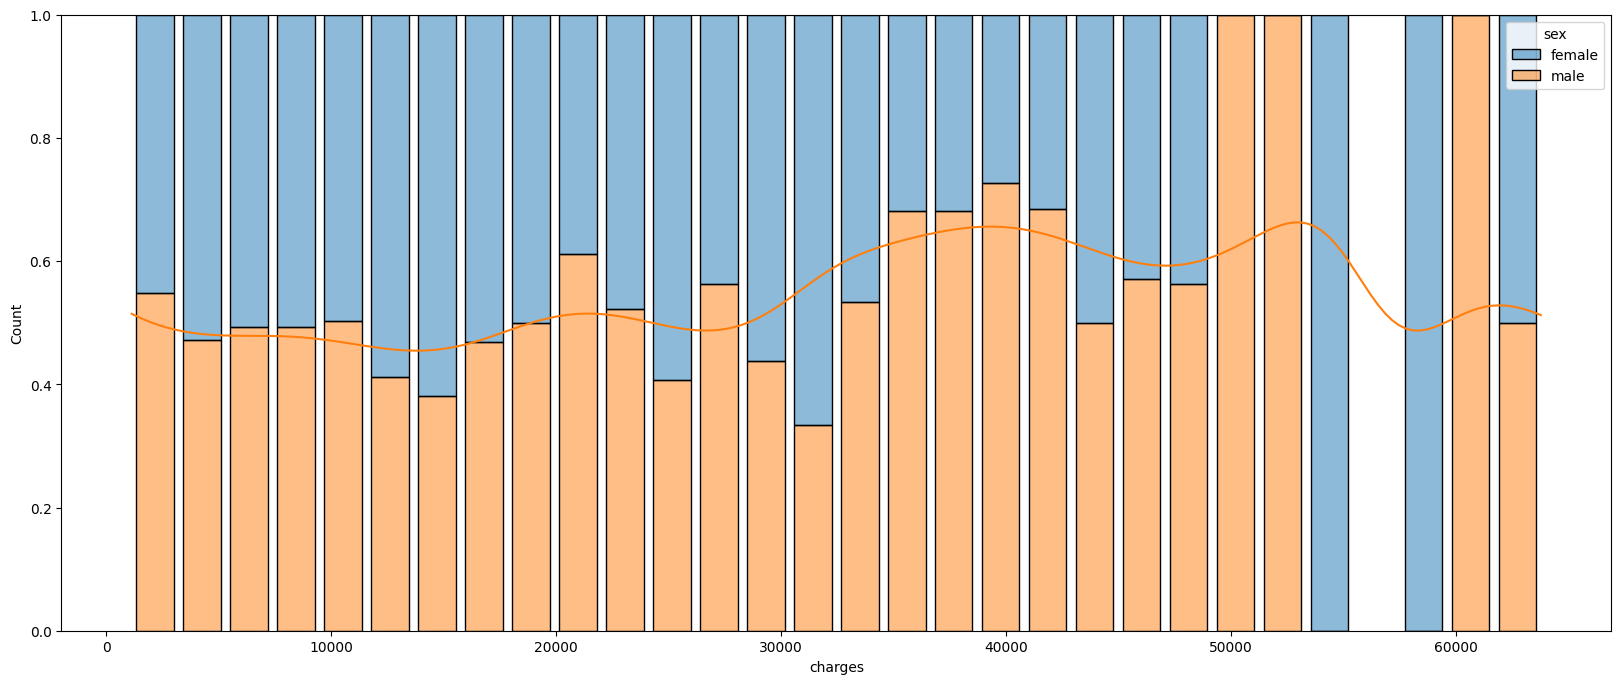

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=data, x='charges', hue='sex', shrink=0.8, multiple='fill',kde=True)

### Observation:
* Males are paying for insurance than females

### Categorical - Numerical
### Charges - Smoker

<Axes: xlabel='charges', ylabel='Count'>

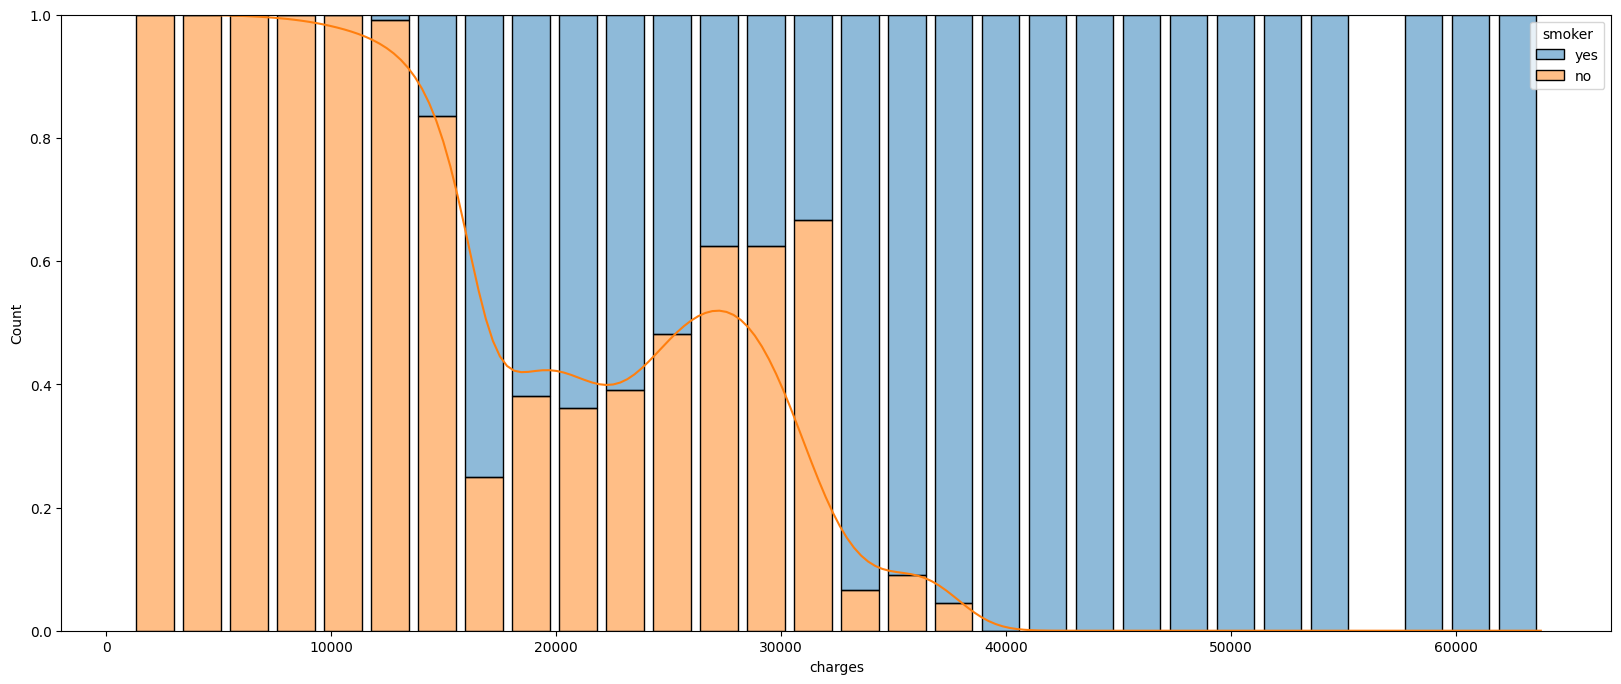

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=data, x='charges', hue='smoker', shrink=0.8, multiple='fill',kde=True)

### Observation:
* We seepositive coorelation
* People who don't smoke pay less money for insurance
* People who smoke pay more money for insurance

### Numerical - Numerical
### Charges - Children

<Axes: xlabel='children', ylabel='charges'>

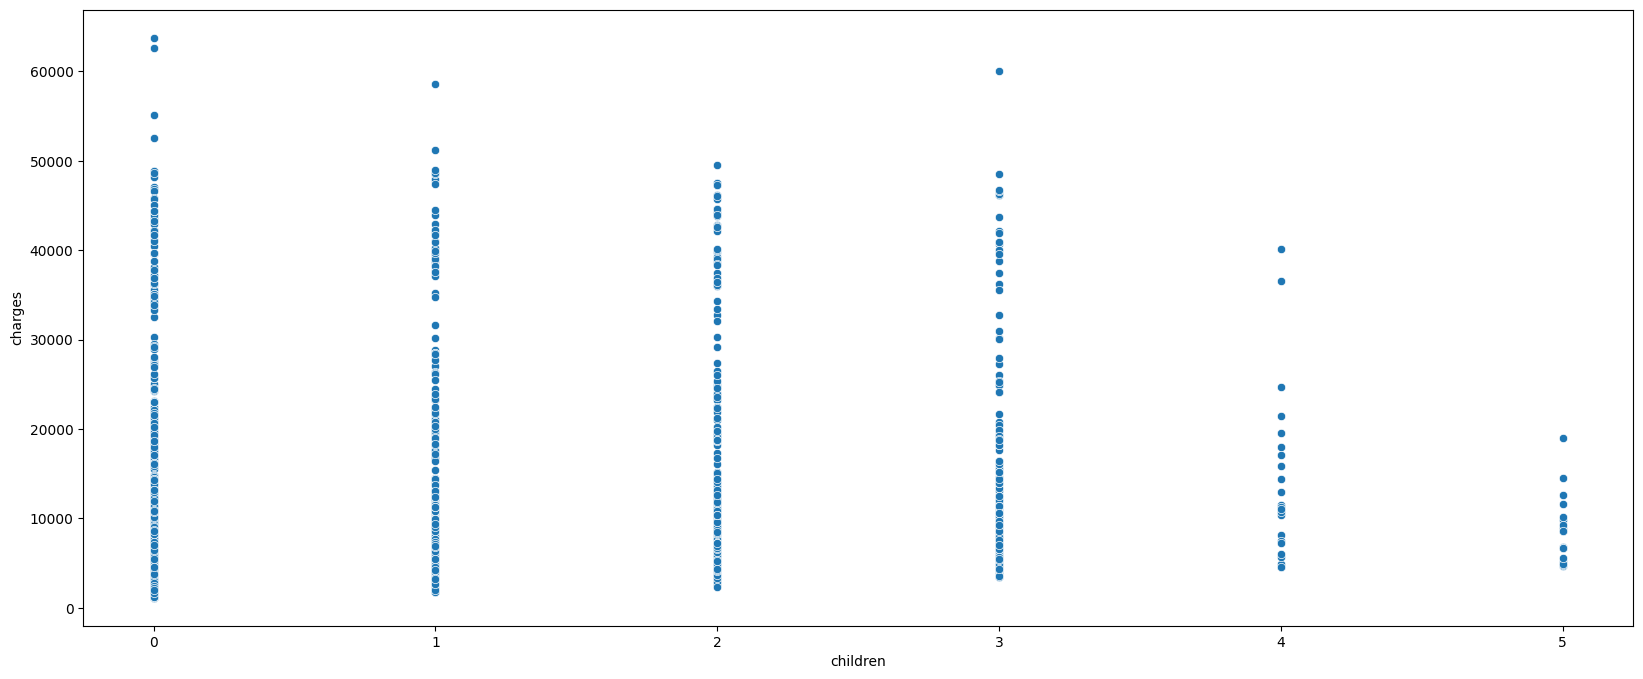

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data=data, x='children', y='charges')

### Observation:
* People with 4 and 5 children pay less money

## Multi-variate analysis

### Age - Charges  - Smoker

<Axes: xlabel='age', ylabel='charges'>

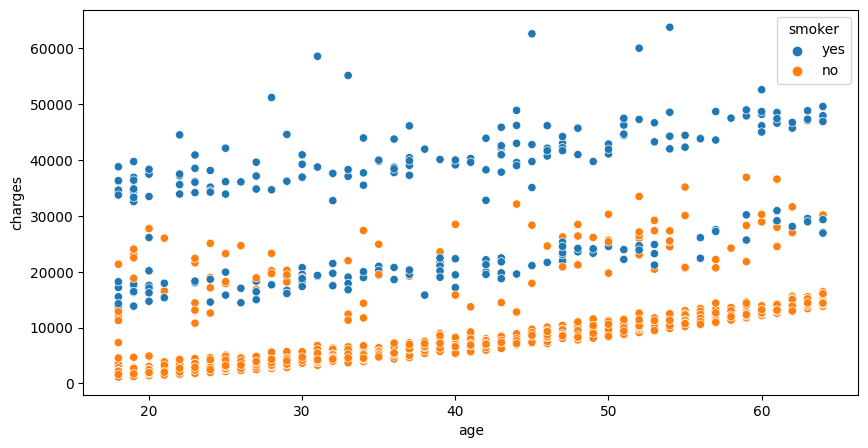

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(data=data, x='age', y='charges', hue='smoker')

### Observation:
* Smokers pay more money for insurance than Non-smokers from every age group
* As age increases, so does money

### BMI - Charges - Smoker

<Axes: xlabel='bmi', ylabel='charges'>

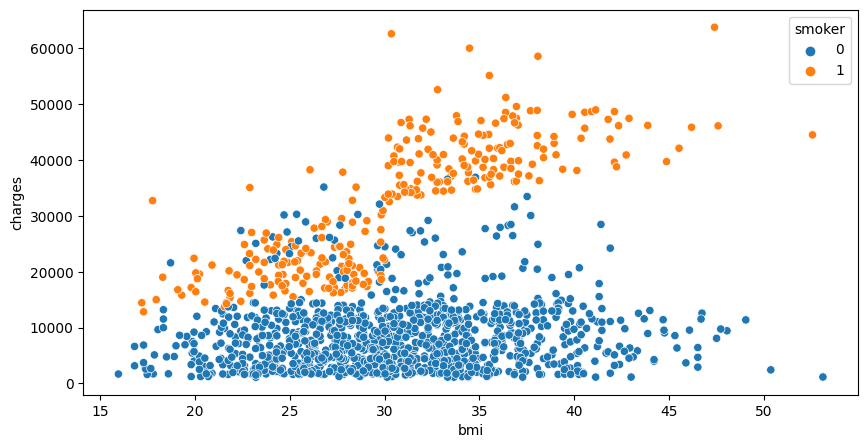

In [45]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker')

### Observation:
* Smokers between BMI of 30 to 45 pays more money for insurance
* Some smokers of BMI above 30 pays more than USD 30,000 for insurance
* Many non-smokers of BMI 20 to 40 pays around USD 15,000 for insurance

### Children - Charges - Smoker

<Axes: xlabel='children', ylabel='charges'>

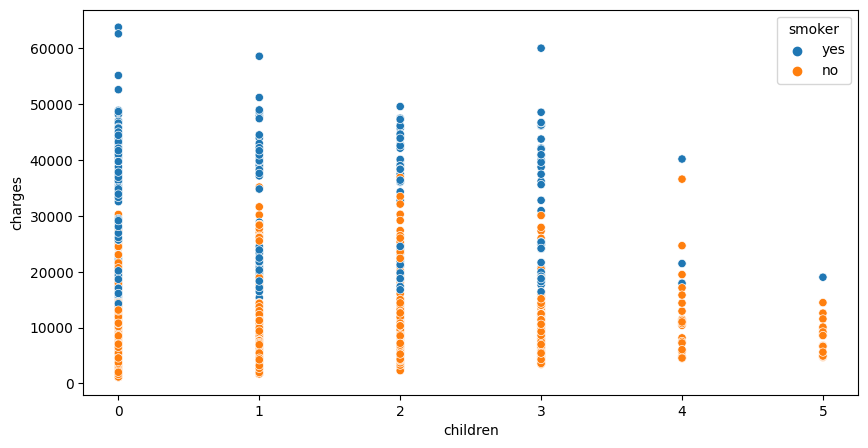

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(data=data, x='children', y='charges', hue='smoker')

### Observation:
* People with no children and with 1 children are most smokers
* People with 4 and 5 children are least smokers


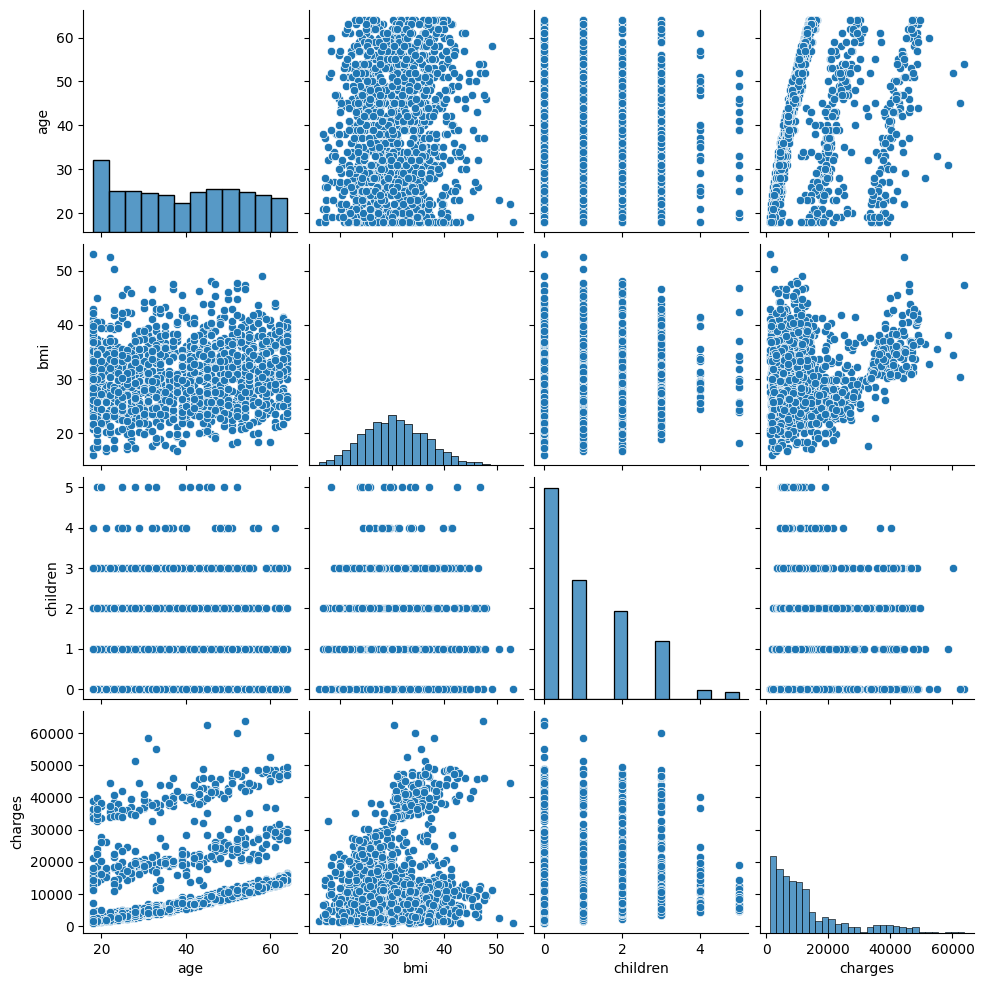

In [26]:
sns.pairplot(data)

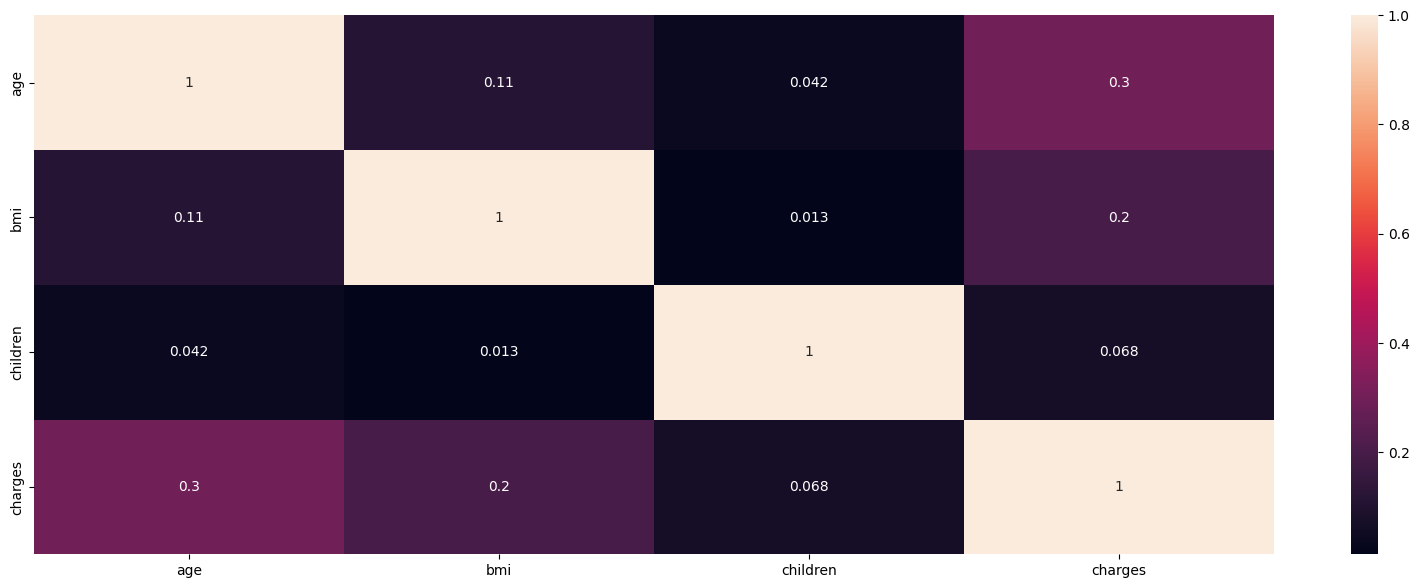

In [27]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(data=corr, annot=True)
plt.show()

### Observation:
* Age, BMI & Children have positive correlation with Charges column

## Encoding

In [28]:
data.replace({'sex':{'male':0, 'female':1}},inplace=True)
data.replace({'smoker':{'no':0, 'yes':1}},inplace=True)
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)

In [29]:
data.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       1  16884.92400
1   18    0  33.770         1       0       0   1725.55230
2   28    0  33.000         3       0       0   4449.46200
3   33    0  22.705         0       0       3  21984.47061
4   32    0  28.880         0       0       3   3866.85520

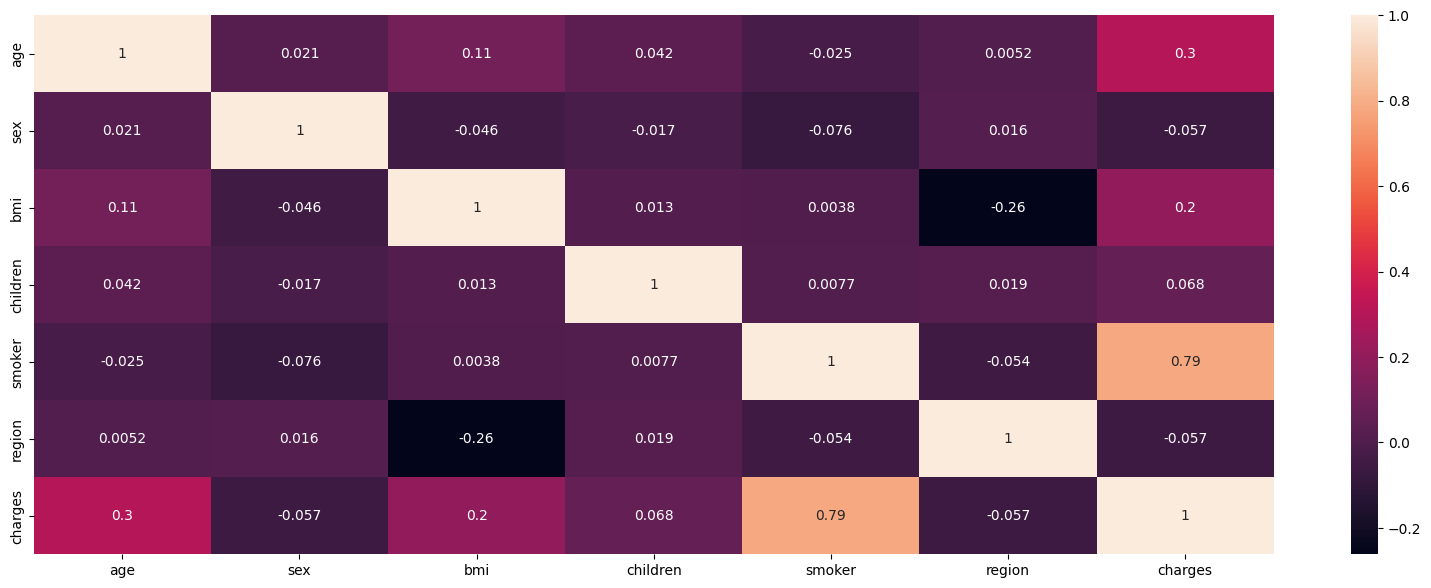

In [30]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(data=corr, annot=True)
plt.show()

## Spliting data

In [31]:
X = data.drop(columns='charges', axis=1)
Y = data['charges']

In [32]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [33]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Spliting into Training data and Testing data

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [36]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1338,) (1070,) (268,)


## Model Training

## Algorithm - LinearRegression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train,Y_train)

LinearRegression()

## Model Evaluation

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_test_pred = lr.predict(X_test)

mae = mean_absolute_error(Y_test, X_test_pred)
mse = mean_squared_error(Y_test, X_test_pred)
r2 = r2_score(Y_test, X_test_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 4190.220190137915
Mean Squared Error: 33685623.354144424
R-squared: 0.783021587162344


## Building a predictive system

In [41]:
data.head(1)

age  sex   bmi  children  smoker  region    charges
0   19    1  27.9         0       1       1  16884.924

In [42]:
input_data = (27,0,42.13,0,1,0)
input_data_as_nparray = np.asarray(input_data)
input_data_reshaped = input_data_as_nparray.reshape(1,-1)
prediction = lr.predict(input_data_reshaped)
print('Predicted Value:',prediction[0])

Predicted Value: 32138.073183203996


In [43]:
39611.7577

39611.7577

# Thank You!